In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def potf(x):
    return 0*x

def potpot_indiv(x):
    if x <= 0 or x >= 1:
        return np.inf
    else:
        return 0.
    
def potpot(x):
    return np.vectorize(potpot_indiv)(x)

def potq(x):
    return 10*x**2/2

def step(x,pot,dx=0.01):
    dx = np.random.choice([-1,1],len(x))*dx
    return x + (np.random.random(len(x))<np.exp(-pot(x+dx)+pot(x)))*dx

In [17]:
def do_sim(num_steps,num_traj,pot,xinit=0):
    x = np.ones((num_steps,num_traj))*xinit
    for i in range(1,num_steps):
        x[i] = step(x[i-1],pot)
    return x

def plot_sim(x):
    msd = np.average(x**2,axis=1)
    fig,ax = plt.subplots(2,1)
    for j in range(0,x.shape[1]):
        ax[0].plot(x[:,j])
    ax[1].plot(msd)
    return plt.gcf()

# Consistent start

/tmp/ipykernel_1600579/991997188.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_sim(x).show()


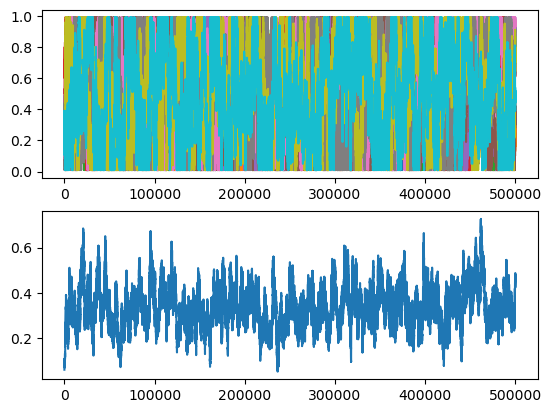

In [41]:
x = do_sim(500000,10,potpot, xinit=0.25)
plot_sim(x).show()

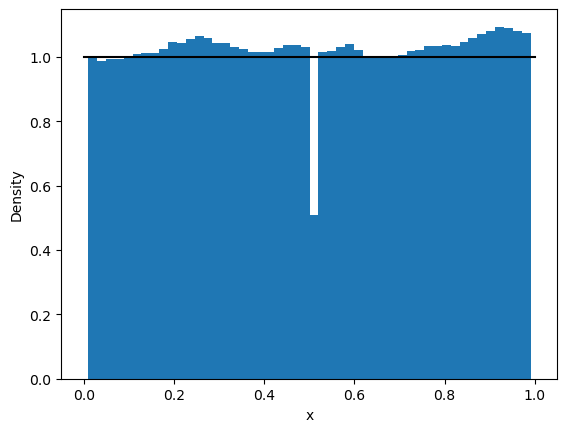

In [43]:
hist, bins = np.histogram(x.ravel(), bins=50, density=True)
plt.bar(bins[:-1], hist, align="edge", width=1/len(hist))
plt.plot([0,1], [1,1], color="black")
plt.xlabel("x")
plt.ylabel("Density")
# plt.savefig("../figures/02 potential well.pdf")
plt.show()

# Random Start

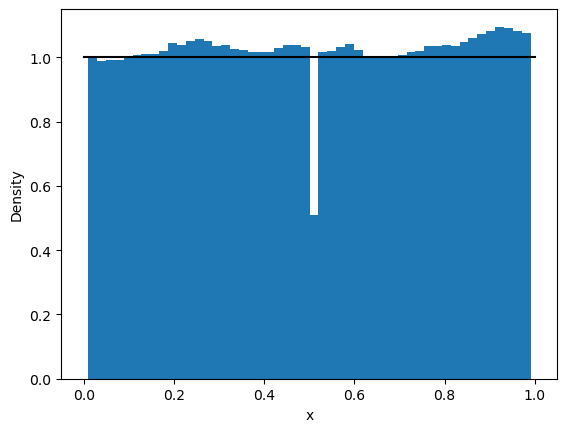

In [52]:
hist, bins = np.histogram(x[1000:, :].ravel(), bins=50, density=True)
plt.bar(bins[:-1], hist, align="edge", width=1/len(hist))
plt.plot([0,1], [1,1], color="black")
plt.xlabel("x")
plt.ylabel("Density")
# plt.savefig("../figures/02 potential well.pdf")
plt.show()

# 2D hist

In [109]:
x = do_sim(1000,1000,potpot, xinit=0.25)

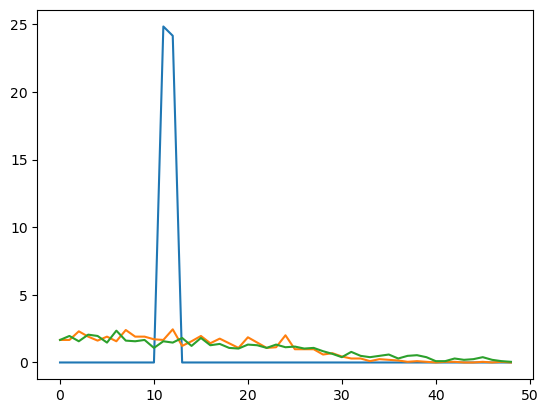

In [137]:
bins = np.linspace(0, 1, 50)
times = range(x.shape[1])
extent=[
		0, x.shape[1], 
		0, 1
	]

hist = np.array([np.histogram(i, bins, density=True)[0] for i in x])

plt.plot(hist[1])
plt.plot(hist[len(hist)//2])
plt.plot(hist[-1])
plt.show()

/tmp/ipykernel_1600579/1446983148.py:2: RuntimeWarning: divide by zero encountered in log
  log_hist = np.log(hist)


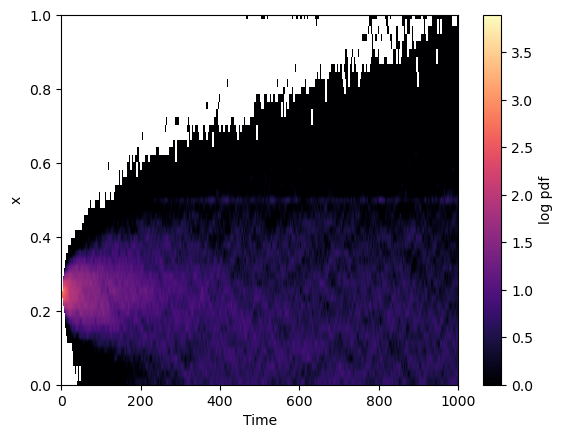

In [147]:
log_hist = hist
log_hist = np.log(hist)

plt.imshow(
	log_hist.T,
	aspect="auto",
	origin="lower",
	extent=[
		0, x.shape[1], 
		0, 1
	],
	vmin=0,
	cmap="magma"
)
plt.colorbar(label="log pdf")

# plt.contour(log_hist.T, 10,
# 	extent=extent,
# 	color="white",
# )

plt.xlabel("Time")
plt.ylabel("x")
plt.show()